<a href="https://colab.research.google.com/github/Sohaib-50/German-Traffic-Sign-Recognition/blob/main/German_Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis And Preprocessing


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget -c https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip  -P /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset
!unzip /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB_Final_Training_Images.zip -d /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00019.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00020.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00021.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00022.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00023.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00024.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Tr

In [ ]:
!dir drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB/Final_Training/Images
!ls -l /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB/Final_Training/Images | grep -c '^d'


00000  00004  00008  00012  00016  00020  00024  00028	00032  00036  00040
00001  00005  00009  00013  00017  00021  00025  00029	00033  00037  00041
00002  00006  00010  00014  00018  00022  00026  00030	00034  00038  00042
00003  00007  00011  00015  00019  00023  00027  00031	00035  00039
43


<i> 43 folders, one for each class </i> 

## Understanding The Dataset

In [ ]:
!dir drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00000

00000_00000.ppm  00001_00023.ppm  00003_00016.ppm  00005_00009.ppm
00000_00001.ppm  00001_00024.ppm  00003_00017.ppm  00005_00010.ppm
00000_00002.ppm  00001_00025.ppm  00003_00018.ppm  00005_00011.ppm
00000_00003.ppm  00001_00026.ppm  00003_00019.ppm  00005_00012.ppm
00000_00004.ppm  00001_00027.ppm  00003_00020.ppm  00005_00013.ppm
00000_00005.ppm  00001_00028.ppm  00003_00021.ppm  00005_00014.ppm
00000_00006.ppm  00001_00029.ppm  00003_00022.ppm  00005_00015.ppm
00000_00007.ppm  00002_00000.ppm  00003_00023.ppm  00005_00016.ppm
00000_00008.ppm  00002_00001.ppm  00003_00024.ppm  00005_00017.ppm
00000_00009.ppm  00002_00002.ppm  00003_00025.ppm  00005_00018.ppm
00000_00010.ppm  00002_00003.ppm  00003_00026.ppm  00005_00019.ppm
00000_00011.ppm  00002_00004.ppm  00003_00027.ppm  00005_00020.ppm
00000_00012.ppm  00002_00005.ppm  00003_00028.ppm  00005_00021.ppm
00000_00013.ppm  00002_00006.ppm  00003_00029.ppm  00005_00022.ppm
00000_00014.ppm  00002_00007.ppm  00004_00000.ppm  00005_00023

<i> Each folder has images for that class (with .ppm extension) and a csv file with annotation information </i>

### Showing some random images from first class

In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from PIL import Image

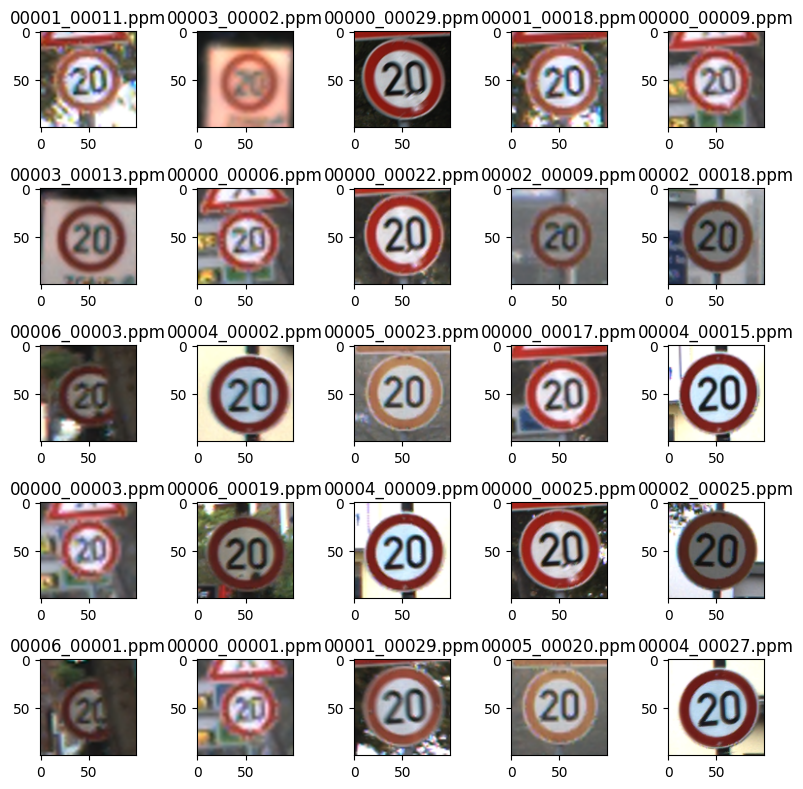

In [ ]:
# Set the path to the folder containing the images
folder_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00000"

# Set the number of rows and columns in the grid
rows = 5
cols = 5

# Get a list of image file names from the folder
file_names = os.listdir(folder_path)

# Filter the list to include only image files
file_names = [f for f in file_names if f.endswith(".ppm")]

# Shuffle the list of file names
np.random.shuffle(file_names)

# Select the first rows * cols file names
file_names = file_names[:rows * cols]

# Create a new figure with a size of 8x8 inches
figure(figsize=(8, 8))

# Loop over the file names and load and display each image in a subplot
for i, file_name in enumerate(file_names):
    # Load the image using PIL
    img = Image.open(os.path.join(folder_path, file_name))
    
    # Resize the image to 100x100 pixels
    img = img.resize((100, 100))
    
    # Add the image to a subplot
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    
    # Add the file name as a title
    plt.title(file_name)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

### Understanding content of annotation CSV file

In [ ]:
import csv

In [ ]:
class_name = "00010"
csv_file_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_name}/GT-{class_name}.csv"

print("First 5 rows:")
with open(csv_file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    i = 0
    for row in csv_reader:
        print(row)
        i += 1
        if i == 5:
          break


First 5 rows:
['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
['00000_00000.ppm', '37', '37', '6', '5', '32', '32', '10']
['00000_00001.ppm', '35', '37', '5', '6', '30', '32', '10']
['00000_00002.ppm', '36', '36', '6', '5', '31', '31', '10']
['00000_00003.ppm', '37', '39', '5', '6', '32', '34', '10']


### Viewing One Image From Each Class

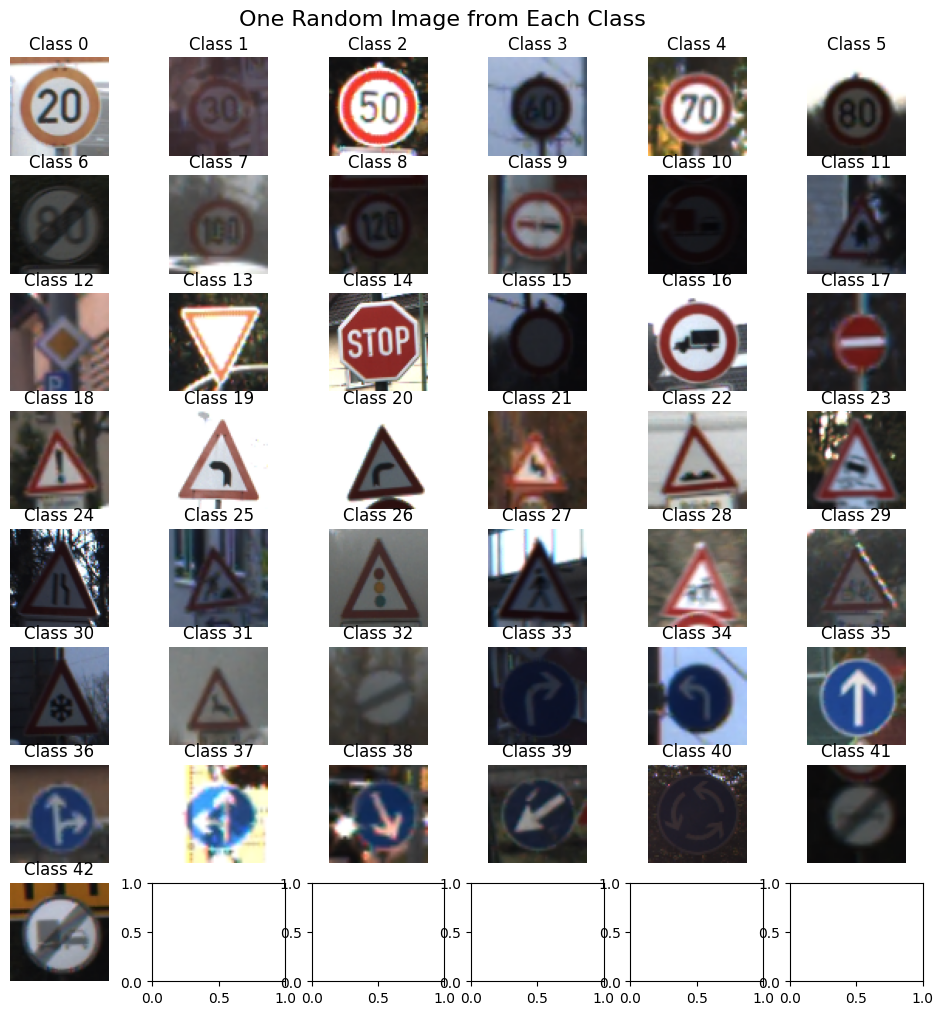

In [ ]:
data_dir = './drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images'
fig, axs = plt.subplots(nrows=8, ncols=6, figsize=(12, 12))
for class_id in range(43):
    folder_path = os.path.join(data_dir, f'{class_id:05}')
    image_file_names = [f for f in os.listdir(folder_path) if f.endswith('.ppm')]
    image_file_name = random.choice(image_file_names)
    image_path = os.path.join(folder_path, image_file_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    row = class_id // 6
    col = class_id % 6
    axs[row, col].imshow(image)
    axs[row, col].set_title(f'Class {class_id}')
    axs[row, col].axis('off')

fig.suptitle('One Random Image from Each Class', fontsize=16, y=0.92)
plt.show()

In [ ]:
for class_id in range(0, 43):
    print(f"> class {class_id}:", end=" ")
    folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_id:05}"

    image_files_count = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ppm"):
            image_files_count += 1
    print(f"Number of image files = {image_files_count}")


> class 0: Number of image files = 210
> class 1: Number of image files = 2220
> class 2: Number of image files = 2250
> class 3: Number of image files = 1410
> class 4: Number of image files = 1980
> class 5: Number of image files = 1860
> class 6: Number of image files = 420
> class 7: Number of image files = 1440
> class 8: Number of image files = 1410
> class 9: Number of image files = 1470
> class 10: Number of image files = 2010
> class 11: Number of image files = 1320
> class 12: Number of image files = 2100
> class 13: Number of image files = 2160
> class 14: Number of image files = 780
> class 15: Number of image files = 630
> class 16: Number of image files = 420
> class 17: Number of image files = 1096
> class 18: Number of image files = 1187
> class 19: Number of image files = 204
> class 20: Number of image files = 360
> class 21: Number of image files = 330
> class 22: Number of image files = 390
> class 23: Number of image files = 510
> class 24: Number of image files = 

In [7]:
import cv2

In [9]:
images_sizes = []
for class_id in range(0, 43):
    print(f"> class {class_id}:", end=" ")
    folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_id:05}"

    image_files_count = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ppm"):
          image_path = os.path.join(folder_path, file_name)
          img = cv2.imread(image_path)
          h, w, c = img.shape
          images_sizes.append((h, w))

> class 0: > class 1: > class 2: > class 3: > class 4: > class 5: > class 6: > class 7: > class 8: > class 9: > class 10: > class 11: > class 12: > class 13: > class 14: > class 15: > class 16: > class 17: > class 18: > class 19: > class 20: > class 21: > class 22: > class 23: > class 24: > class 25: > class 26: > class 27: > class 28: > class 29: > class 30: > class 31: > class 32: > class 33: > class 34: > class 35: > class 36: > class 37: > class 38: > class 39: > class 40: > class 41: > class 42: 

In [10]:
print(f"Total images: {len(images_sizes)}")
print(f"Largest image size: {max(images_sizes)}")
print(f"Smallest image size: {min(images_sizes)}")
avg_h = sum([x[0] for x in images_sizes])/len(images_sizes)
avg_w = sum([x[1] for x in images_sizes])/len(images_sizes)
print(f"Average image size: ({avg_h:.2f}, {avg_w:.2f})")

Total images: 39162
Largest image size: (225, 243)
Smallest image size: (25, 25)
Average image size: (50.34, 50.85)


## Cropping Images
First going to try cropping logic on few images from 00000 folder (1st class)

In [6]:
import random
import pandas as pd
import cv2

Cropping 00005_00007.ppm
width: 33, height: 30, x1: 6, y1: 5, x2: 28, y2: 25, class_id: 0


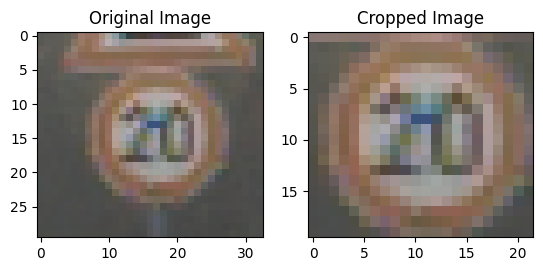

Cropping 00002_00002.ppm
width: 27, height: 28, x1: 5, y1: 6, x2: 22, y2: 23, class_id: 0


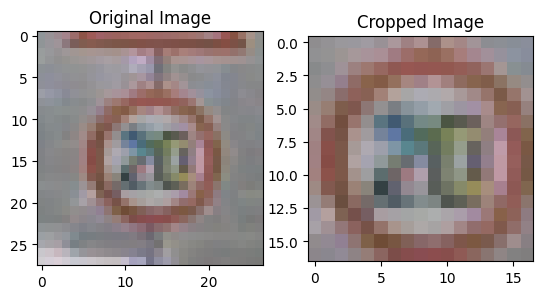

Cropping 00004_00014.ppm
width: 70, height: 74, x1: 7, y1: 7, x2: 64, y2: 68, class_id: 0


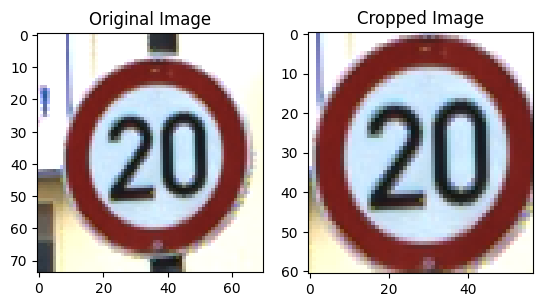

Cropping 00004_00015.ppm
width: 72, height: 75, x1: 7, y1: 6, x2: 65, y2: 68, class_id: 0


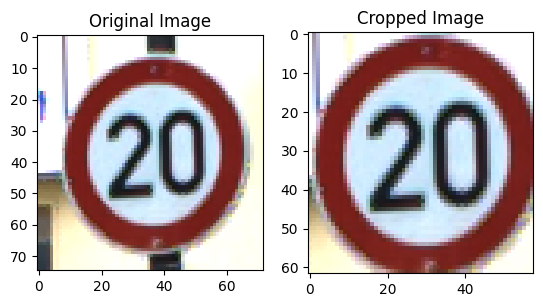

Cropping 00000_00017.ppm
width: 47, height: 48, x1: 6, y1: 6, x2: 42, y2: 42, class_id: 0


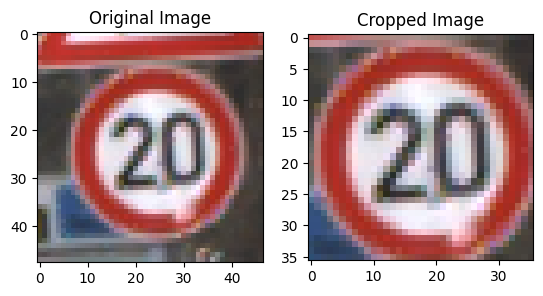

In [ ]:
class_number = "00000"
n_files_to_load = 5
folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_number}"
image_file_names = random.sample([f for f in os.listdir(folder_path) if f.endswith(".ppm")], n_files_to_load)  # Get a list of n_files_to_load random image file names from the folder
csv_content = pd.read_csv(f"{folder_path}/GT-{class_number}.csv", delimiter=";")  # Load annotation information

for file_name in image_file_names:
  print(f"Cropping {file_name}")
  row = csv_content.loc[csv_content['Filename'] == file_name]
  filename, width, height, x1, y1, x2, y2, class_id = row.values[0]
  print(f"width: {width}, height: {height}, x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}, class_id: {class_id}")
  
  image = cv2.cvtColor(cv2.imread(os.path.join(folder_path, file_name)), cv2.COLOR_BGR2RGB) # load and convert image

  # crop image
  x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
  cropped_image = image[y1:y2, x1:x2]

  # Display original and cropped images side by side
  fig, axs = plt.subplots(ncols=2)
  axs[0].imshow(image)
  axs[0].set_title('Original Image')
  axs[1].imshow(cropped_image)
  axs[1].set_title('Cropped Image')
  plt.show()


<i> Seems to work </i>

### Cropping all images of dataset 

In [ ]:
# Create the directory to store the cropped images
os.makedirs("./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images_Cropped", exist_ok=True)

for class_id in range(0, 43):
    print(f"> Cropping images for class {class_id}.")
    folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_id:05}"
    os.makedirs(f"{folder_path}_Cropped") # Create a new directory for the cropped images
    
    csv_content = pd.read_csv(f"{folder_path}/GT-{class_id:05}.csv", delimiter=";")  # Load annotation information

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ppm"):
            row = csv_content.loc[csv_content['Filename'] == file_name]
            filename, width, height, x1, y1, x2, y2, class_id = row.values[0]

            image = cv2.cvtColor(cv2.imread(os.path.join(folder_path, file_name)), cv2.COLOR_BGR2RGB) # load and convert image

            # crop image
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cropped_image = image[y1:y2, x1:x2]

            # Save cropped image to the new directory
            cv2.imwrite(os.path.join(f"{folder_path}_Cropped", file_name), cropped_image)

print("Done cropping images!")

> Cropping images for class 0.
> Cropping images for class 1.
> Cropping images for class 2.
> Cropping images for class 3.
> Cropping images for class 4.
> Cropping images for class 5.
> Cropping images for class 6.
> Cropping images for class 7.
> Cropping images for class 8.
> Cropping images for class 9.
> Cropping images for class 10.
> Cropping images for class 11.
> Cropping images for class 12.
> Cropping images for class 13.
> Cropping images for class 14.
> Cropping images for class 15.
> Cropping images for class 16.
> Cropping images for class 17.
> Cropping images for class 18.
> Cropping images for class 19.
> Cropping images for class 20.
> Cropping images for class 21.
> Cropping images for class 22.
> Cropping images for class 23.
> Cropping images for class 24.
> Cropping images for class 25.
> Cropping images for class 26.
> Cropping images for class 27.
> Cropping images for class 28.
> Cropping images for class 29.
> Cropping images for class 30.
> Cropping images 

In [14]:
import shutil

for class_id in range(0, 43):
    print(f"> Moving cropped images for class {class_id}.")
    source_dir = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_id:05}_Cropped"
    dest_dir = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images_Cropped/{class_id:05}"
    
    # Create the destination directory if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)
    
    # Move all images from the source directory to the destination directory
    for file_name in os.listdir(source_dir):
        shutil.move(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))
    
    # Remove the now empty source directory
    os.rmdir(source_dir)

print("Done moving images!")


> Moving cropped images for class 0.
> Moving cropped images for class 1.
> Moving cropped images for class 2.
> Moving cropped images for class 3.
> Moving cropped images for class 4.
> Moving cropped images for class 5.
> Moving cropped images for class 6.
> Moving cropped images for class 7.
> Moving cropped images for class 8.
> Moving cropped images for class 9.
> Moving cropped images for class 10.
> Moving cropped images for class 11.
> Moving cropped images for class 12.
> Moving cropped images for class 13.
> Moving cropped images for class 14.
> Moving cropped images for class 15.
> Moving cropped images for class 16.
> Moving cropped images for class 17.
> Moving cropped images for class 18.
> Moving cropped images for class 19.
> Moving cropped images for class 20.
> Moving cropped images for class 21.
> Moving cropped images for class 22.
> Moving cropped images for class 23.
> Moving cropped images for class 24.
> Moving cropped images for class 25.
> Moving cropped image

In [15]:
images_sizes = []
for class_id in range(0, 43):
    print(f"> class {class_id}:", end=" ")
    folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images_Cropped/{class_id:05}"

    image_files_count = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ppm"):
          image_path = os.path.join(folder_path, file_name)
          img = cv2.imread(image_path)
          h, w, c = img.shape
          images_sizes.append((h, w))

> class 0: > class 1: > class 2: > class 3: > class 4: > class 5: > class 6: > class 7: > class 8: > class 9: > class 10: > class 11: > class 12: > class 13: > class 14: > class 15: > class 16: > class 17: > class 18: > class 19: > class 20: > class 21: > class 22: > class 23: > class 24: > class 25: > class 26: > class 27: > class 28: > class 29: > class 30: > class 31: > class 32: > class 33: > class 34: > class 35: > class 36: > class 37: > class 38: > class 39: > class 40: > class 41: > class 42: 

In [16]:
print(f"Total images: {len(images_sizes)}")
print(f"Largest image size: {max(images_sizes)}")
print(f"Smallest image size: {min(images_sizes)}")
avg_h = sum([x[0] for x in images_sizes])/len(images_sizes)
avg_w = sum([x[1] for x in images_sizes])/len(images_sizes)
print(f"Average image size: ({avg_h:.2f}, {avg_w:.2f})")

Total images: 39061
Largest image size: (185, 203)
Smallest image size: (15, 15)
Average image size: (38.79, 39.21)


In [17]:
!git status

fatal: not a git repository (or any of the parent directories): .git
